# Lecture 05 Modeling Basics: Linear & Logistic Regression Models 

* ECO6763 by David Guo

## Linear & Logistic Regression Models 
* Regression is the first algorithm we need to master if we are aspiring to become a data scientist. 
* It is one of the easiest algorithms to learn yet requires understanding and effort to master it
* Linear Regression Model: basic for almost all kinds of Models
* Logistic Regression Model: basic Machine Learning classification Model

In [1]:
# import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm

### `statsmodels`
* A library for statistical modeling, implementing standard econometric/ statistical
models in Python using NumPy and SciPy
Includes:
    * Linear (regression) models of many forms
    * Descriptive statistics
    * Statistical tests
        
[statsmodels documentation (github)](http://github.com/statsmodels/statsmodels)

# Webpage of Statsmodels
https://www.statsmodels.org/stable/index.html


## What is regression? It deals with continous dependent variable. A simple example: 

In [23]:
data_str = '''Region Alcohol_Consumption Tobacco_Consumption
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
EastMidlands 4.89 3.34
WestMidlands 5.63 3.47
EastAnglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
NorthernIreland 6.02 4.56'''

# data source: "An Introduction to Statistics with Python: With Applications in the Life Science"

In [24]:
#parse string to df
d = data_str.split('\n')
d = [ i.split(' ') for i in d ]

for i in range( len( d ) ):
    for j in range( len( d[0] ) ):
        try:
            d[i][j] = float( d[i][j] )
        except:
            pass
df = pd.DataFrame(d[1:], columns=d[0] )
df

Region  Alcohol_Consumption  Tobacco_Consumption
0             North                 6.47                 4.03
1         Yorkshire                 6.13                 3.76
2         Northeast                 6.19                 3.77
3      EastMidlands                 4.89                 3.34
4      WestMidlands                 5.63                 3.47
5        EastAnglia                 4.52                 2.92
6         Southeast                 5.89                 3.20
7         Southwest                 4.79                 2.71
8             Wales                 5.27                 3.53
9          Scotland                 6.08                 4.51
10  NorthernIreland                 6.02                 4.56

In [26]:
#or read a small data directly from clipboard, in this case
pd.read_clipboard()

Region  Alcohol_Consumption  Tobacco_Consumption
0             North                 6.47                 4.03
1         Yorkshire                 6.13                 3.76
2         Northeast                 6.19                 3.77
3      EastMidlands                 4.89                 3.34
4      WestMidlands                 5.63                 3.47
5        EastAnglia                 4.52                 2.92
6         Southeast                 5.89                 3.20
7         Southwest                 4.79                 2.71
8             Wales                 5.27                 3.53
9          Scotland                 6.08                 4.51
10  NorthernIreland                 6.02                 4.56

Text(0, 0.5, 'Tobacco_Consumption')

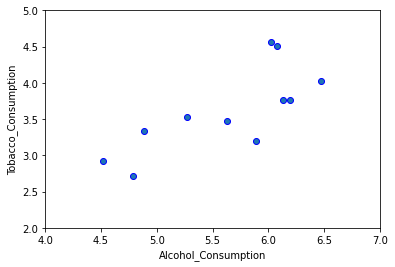

In [21]:
plt.scatter( df.Alcohol_Consumption, df.Tobacco_Consumption,
         marker='o',
         edgecolor='b' )
plt.axis([4, 7, 2, 5]) #[xmin, xmax, ymin, ymax]
plt.xlabel('Alcohol_Consumption')
plt.ylabel('Tobacco_Consumption')

# Linear regression 

**Linear regression is a common statistical technique to model the linear relationship between variables**
<center><img src="Inputs/LinearRegression1.PNG" width="750" height="500" /></center>

`Ordinary Least Squares (OLS)` is a type of linear least squares method for choosing the unknown parameters (`beta`) in a linear regression equition. minimizing the sum of the squares of the differences between the observed dependent variable (DV) and the output of the linear function of the independent variable (IV)

How to find the best line -- "Least squares estimation"**
<center><img src="Inputs/LinearRegression3.PNG" width="750" height="500" /></center>

## check the mathmatics derivate on beta coefficient @ https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf

### Linear regression formulas
<br>
<center><img src="Inputs/LinearRegression2.PNG" width="1000" height="800" /></center>

* Y - Target/DV (Dependent Variable); X - IV (Independent Variable)

Sum of Squares Residual/Error (SSE): $$SSE = \sum (y_i - \hat{y_i})^2 $$
Sum of Squares Total (SST): $$SST = \sum (y_i - \bar{y_i})^2$$
Sum of Squares Regression (SSR): $$SSR = \sum (\hat{y_i} - \bar{y_i})^2$$

<center><img src="Inputs/SSESSR.png"  width="800" height="400" /></center>

#### Linear Regression model (manual calculation)

$$
\hat{y} = \beta_0 + \beta_1 x_1   $$
$$(+ \beta_2 x_2 + \dots + \beta_n x_n)
$$


Sometime, $ \beta_0 $ is called $ \alpha $

**Estimation Equation**

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

(The derivation of the equation(s) is out of the scope of this class, see link https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf)


### Example - linear relation between X (IV) and y (DV):

In [27]:
# Step 1: data generation by adding random noise to data points
np.random.seed(1234) # to make this notebook's output stable across runs
nsample = 200
X = 2 * np.random.rand(nsample, 1)
y = 4 + 3 * X + np.random.randn(nsample, 1)

In [ ]:
beta0 = 4
beta1 = 3

In [29]:
print(len(X))
X[:2]

200


array([[0.3830389 ],
       [1.24421754]])

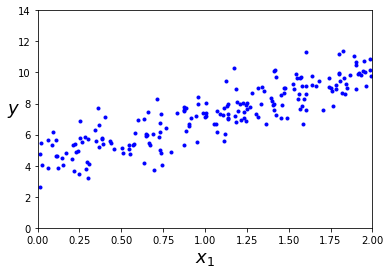

In [25]:
plt.plot(X, y, "b.") #blue dots
plt.xlabel("$x_1$", fontsize=18) #Xlabel LaTeX function 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 14])
plt.show()

* let us refresh the knowledge of dot product vs matrix multiplication

In [31]:
a = np.array([[1, 0], [0, 1]])
b = np.array([[4, 1], [2, 2]])
np.dot(a, b)

array([[4, 1],
       [2, 2]])

In [32]:
a.shape

(2, 2)

In [9]:
print(a); print(b)

[[1 0]
 [0 1]]
[[4 1]
 [2 2]]


In [10]:
np.dot(a, b) #or a @ b, row to column multiplication then sum 

array([[4, 1],
       [2, 2]])

In [11]:
np.multiply(a, b) #pairwise multiplication

array([[4, 0],
       [0, 2]])

# use python code to get '$ \beta $'

In [12]:
np.random.seed(1234) # to make this notebook's output stable across runs
nsample = 200
X = 2 * np.random.rand(nsample, 1)
y = 4 + 3 * X + np.random.randn(nsample, 1)

In [13]:
X[:2]

array([[0.3830389 ],
       [1.24421754]])

In [14]:
y[:2]

array([[5.77789253],
       [7.91914698]])

In [20]:
# Stack 1-D arrays as columns into a 2-D array.
np.c_[np.ones((nsample, 1)), X][:2]

array([[1.        , 0.3830389 ],
       [1.        , 1.24421754]])

In [22]:
np.concatenate([np.ones((nsample, 1)), X], axis = 1)[:2]

array([[1.        , 0.3830389 ],
       [1.        , 1.24421754]])

In [34]:
X_b = np.c_[np.ones((nsample, 1)), X] # np.concatenate([np.ones((nsample, 1)), X], axis = 1).shape 
# concatenate by axis=1 with x0 = 1 as the 1st column, which will be used form x0 * beta0
print(X_b[:2])

[[1.         0.3830389 ]
 [1.         1.24421754]]


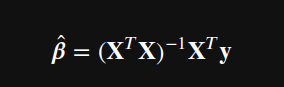

In [35]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #  
print(f'The beta_0 is {theta_best[0][0]}, and the beta_1 is {theta_best[1][0]}')

The beta_0 is 4.216378875467584, and the beta_1 is 2.914521868642037


In [37]:
X_new = np.array([0,2]) #new data with 2 values for X
print(X_new)

[0 2]


In [39]:
#create input with `$beta0` of 1 
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance by np.c_
#print(f"To be predicted matrix {np.array(X_new_b)}")
X_new_b


array([[1., 0.],
       [1., 2.]])

In [40]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21637888],
       [10.04542261]])

In [43]:
X_new

array([0, 2])

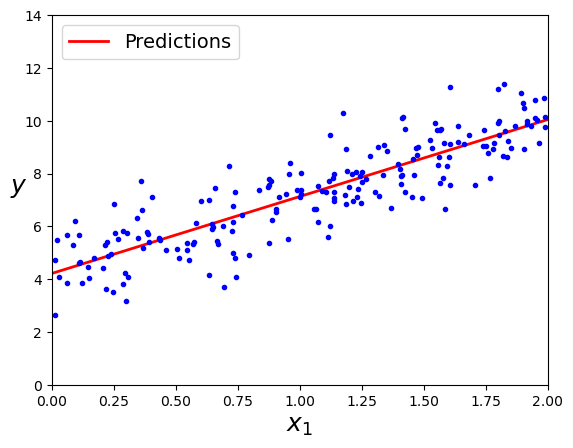

In [44]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 14]) #xmin = 0, xmax = 4, ymin = 0, ymax = 14 
# plt.savefig('My first linear regression')
plt.show()

## Fit Linear Regression model using build in packages `statsmodels.api`, similar to SAS

In [46]:
import statsmodels.api as sm

X_const = sm.add_constant(X) #equivalent to X_b
X_const[:10]

array([[1.        , 0.3830389 ],
       [1.        , 1.24421754],
       [1.        , 0.87545548],
       [1.        , 1.57071717],
       [1.        , 1.55995162],
       [1.        , 0.54518521],
       [1.        , 0.55292851],
       [1.        , 1.60374436],
       [1.        , 1.91627871],
       [1.        , 1.75186527]])

In [ ]:
OLS_model = sm.OLS(y,X_const)
model = OLS_model.fit()
model.summary() #it looks like SAS wholesale output, doesn't it, LOL

In [47]:
model = sm.OLS(y,X_const).fit()

In [52]:
print(type(model.summary()))
model.summary2().tables[0]

<class 'statsmodels.iolib.summary.Summary'>


0                 1                    2         3
0               Model:               OLS      Adj. R-squared:     0.757
1  Dependent Variable:                 y                 AIC:  548.0050
2                Date:  2023-10-25 19:14                 BIC:  554.6016
3    No. Observations:               200      Log-Likelihood:   -272.00
4            Df Model:                 1         F-statistic:     620.8
5        Df Residuals:               198  Prob (F-statistic):  6.00e-63
6           R-squared:             0.758               Scale:   0.89781

In [53]:
model.summary2().tables[1] #p-value, pls google it, you would like to see the p-value is less than a threshold (significance) of 0.05 

Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
const  4.216379  0.140433  30.024137  1.228086e-75  3.939443  4.493315
x1     2.914522  0.116976  24.915565  6.004805e-63  2.683843  3.145200

In [54]:
model.summary2().tables[2]

0      1                  2      3
0        Omnibus:  0.510     Durbin-Watson:  1.840
1  Prob(Omnibus):  0.775  Jarque-Bera (JB):  0.303
2           Skew:  0.082          Prob(JB):  0.859
3       Kurtosis:  3.096     Condition No.:      4

## R-squared: higher, better, Higher R2 mean the model can explain the variance of y.
## Adj R-squared: take observation number of X into account @ https://www.graphpad.com/guides/prism/latest/curve-fitting/reg_adjusted-r-squared.htm
## AIC and BIC should be as smaller as possible

In [67]:
len(model.summary2().tables)

3

In [68]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.757   
Dependent Variable: y                AIC:                548.0050
Date:               2022-10-08 11:39 BIC:                554.6016
No. Observations:   200              Log-Likelihood:     -272.00 
Df Model:           1                F-statistic:        620.8   
Df Residuals:       198              Prob (F-statistic): 6.00e-63
R-squared:          0.758            Scale:              0.89781 
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    4.2164      0.1404    30.0241    0.0000    3.9394    4.4933
x1       2.9145      0.1170    24.9156    0.0000    2.6838    3.1452
-----------------------------------------------------------------
Omnibus:              0.510        Durbin-Watson:           1.840
Prob(Omnibus):        0.775        Jarque-Bera (JB):        0.303
Skew:                 0.082        Prob(JB):                0.859
Kurtosis:             3.096        Condition No.:           4    
=================================================================

"""

In [69]:
model.summary2().tables[1]

Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
const  4.216379  0.140433  30.024137  1.228086e-75  3.939443  4.493315
x1     2.914522  0.116976  24.915565  6.004805e-63  2.683843  3.145200

### Using models to make predictions

In [70]:
model.predict(X_new_b)

array([ 4.21637888, 10.04542261])

### get model Coefficients

By minimizing SSE/MSE (cost/object function) we get
$$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

In [71]:
model.params #get coefficients

array([4.21637888, 2.91452187])

### Standard Error of Coefficients to see if the coefficient is significant
$
CE = ({X}^T {X})^{-1} *\sigma^2 
$

In [72]:
X_const[:5]

array([[1.        , 0.3830389 ],
       [1.        , 1.24421754],
       [1.        , 0.87545548],
       [1.        , 1.57071717],
       [1.        , 1.55995162]])

In [66]:
# convert the NumPy arrray to matrix
X = np.matrix(X_const) #X_const is 2D array
X[:5]

matrix([[1.        , 0.3830389 ],
        [1.        , 1.24421754],
        [1.        , 0.87545548],
        [1.        , 1.57071717],
        [1.        , 1.55995162]])

In [67]:
# perform the matrix multiplication and then take the inverse of it
CE = np.linalg.inv(X.T * X) 
CE.shape

(2, 2)

In [68]:
CE.shape

(2, 2)

In [70]:
model.mse_resid

0.8978053754947753

In [71]:
CE = CE * model.mse_resid

In [72]:
# multiply by the MSE of the residual (sigma^2)
# #"mse" for mean square error
print(CE.shape)
CE #close enough!

(2, 2)


matrix([[ 0.01972142, -0.01443712],
        [-0.01443712,  0.01368337]])

In [74]:
np.sqrt(4) == 2

True

In [73]:
# take the square root of diagnal values of CE and round it to 3 decimal
SE = np.round(np.sqrt(np.diag(CE)), 3) 
print(SE)

[0.14  0.117]


### T-statistic and P-value

A t-statistic is a measure of how different our estimation from 0 given the data that we are using. The t-statistic can be translated into a p-value (a probability).

### **The P-value is the likelihood (probability) that the null hypothesis is true given the sample that we have collected.**

In our case, since the p-value is greater than .05 we will fail to reject the null hypothesis. that is, the coefficient is significant for the model (remember that we need to be 95% confident that the alternative hypothesis is true e.g. < 5% confident that the null hypothesis is true.

## Evaluating Model Performance

like checking the engine of a flight

### $R^{2}$ and Adjusted $R^{2}$

The $R^{2}$ term is the coefficient of determination and it usually reflects how well the model fits the observed data. 
The coefficient of determination is usually given by:

$$R^2 = 1 - \frac{SSE}{SST}$$

Where $y_{i}$ is an observed response, $\bar{y}$ is the mean of the observed responses, $\hat{y_{i}}$ is a prediction of the response made by the linear model, and $(y_{i} - \hat{y_{i}})$ is the residual, i.e., the difference between the response and the prediction. Also, SSE is called the sum of the squared error, or SSR the sum of the squared residuals, and SST is called the total sum of squares.

$$adjusted \  R^2 = 1 - \frac{(1-R^2)*(n-1)}{(n-p)}$$


where n is the number of data/obsevation and p the number of parameters or variables

In [78]:
SSE = model.mse_resid * nsample #sum of the squared error
SST = sum(np.square(y - np.mean(y))) #total sum of squares

r_square = 1 - SSE/SST
print(r_square.item(), model.rsquared) #compare calcualted r-square with sm output, they are close enough to each other.

0.7557357492912358 0.7581783917983235


### Log-Likelihood

A probability density function is a function of x, your data point, and it will tell you how likely it is that certain data points appear. A likelihood function, on the other hand, takes the data set as a given, and represents the likeliness of different parameters for your distribution.

$$p(D\; | \;  \pmb \theta\;) \\\\
= p(\pmb x_1 \; | \; \pmb \theta\;)\; \cdot \; p(\pmb x_2 \; | \;\pmb \theta\;) \; \cdot \;...  \; p(\pmb x_n \; | \; \pmb \theta\;) \\\\
= \prod_{k=1}^{n} \; p(\pmb x_k \pmb \; | \; \pmb \theta \;)$$

$$\\
\Rightarrow l(\theta) = \sum_{k=1}^{n} ln \; p(x_k|\theta)$$

In [80]:
N = model.nobs #number of observations

SSR = model.ssr

s2 = SSR / N

#given a "strong" assumption that error term has zero
#mean with constant variance, it also follows normal distribution
L = (1.0/np.sqrt(2*np.pi*s2)) ** N * np.exp(-SSR/(s2*2.0)) 

print ('ln(L) =', round( np.log(L),2))

ln(L) = -272.0


For more to reference about log-likelihood: https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf

### AIC and BIC

The Akaike information criterion (AIC) and the Bayesian information criterion (BIC) are based on the log-likelihood described in the previous section. Both measures introduce a penalty for model complexity, but the AIC penalizes complexity less severely than the BIC. The AIC and BIC are given by:

$$AIC = 2*(p+1)-2*l(\theta)$$
$$BIC = (p +1)*ln(N)-2*l(\theta)$$

In [81]:
AIC = 2 * (model.df_model+1) - 2 * np.log(L)
BIC = np.log(nsample) * (model.df_model+1) - 2 * np.log(L)
print(AIC,BIC) #the lower, the better

548.0049530622945 554.6015877953905


# <center> AIC and BIC, R squared values are linear regression model performance matrices, determining which model is the best model.

### t-Statistic

The t-test is used to test the null hypothesis that coefficient of a given variable is zero. Usually it is tested at $\alpha$ = 0.05 or 0.001. If Pr(T $\geq$ |t|) < $\alpha$, we reject null hypothesis that the variable is a significant variable for the model. 

\begin{align*} t_i = \beta_i/SE_i,_i\end{align*}

In [89]:
for i in range(2):
    beta = model.params[i]
    se = SE[i]
    t= beta/se
    print("t-Statistic for beta_%s is "%i, t) #

t-Statistic for beta_0 is  30.116991967625513
t-Statistic for beta_1 is  24.91044332172686


In [90]:
(model.summary2().tables[1]).t #close enough !

const    30.024137
x1       24.915565
Name: t, dtype: float64

# Logistic regression (predict a binary outcome with probilities)

### We know (left chart) is linear regression,  (right chart) is new...

**We know** | **This is new...**  
- | - 
![alt](Inputs/LinearRegression.png) | ![alt](Inputs/LogisticRegression.PNG)

Logistic regression Examples:
* Going vacation or not
* Mail customers (coupons, ads...)
* Fraud or not Fraud/Spam or not Spam
* ...

In [ ]:
LET US COME BACK @ 7:50 

# Logistic regression

## 1. Concepts

**Logistic Regression model estimated probability in vectorized form **

<center><img src="Inputs/LogisticProbability.PNG" width="850" height="600" /></center>

$$ln \frac{p}{1-p} = {\theta}^T \mathbf{x}$$

**or**
$$
p = \sigma(\boldsymbol{\theta}^T \mathbf{x})    ,\      \sigma(t) = \dfrac{1}{1 + \exp(-t)}$$

Some case it is call "Sigmoid function" @  https://en.wikipedia.org/wiki/Sigmoid_function

**Logistic Regression model prediction**

$$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$$

### Now it is about the parameters $\theta$
### Remeber this?

$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$



**Estimation Equation**

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$





### Training and Cost Function for logistic regression (Optional Slides)
Details in derivate @ https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d



**Cost function of a single training instance**

$$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$$


**Logistic Regression cost/loss function (log loss)**

$$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$$

The bad news is that there is no known closed-form equation to compute the value of $θ$ that minimizes this cost function (there is no equivalent of the Linear Equation).
But the good news is that this cost function is convex, so it is guaranteed to find the global minimum. The partial derivatives of the cost function with regards to the jth model parameter `θj` is given by

**Logistic cost function partial derivatives**

$$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$$


<center><img src="Inputs/LinearvsLogisticRegression.png" width="850" height="600" /></center>

## Logistic regression Example 1

### Load Data
[Data Source](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [82]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp',  'insulin', 'bmi', 'pedigree', 'age', 'label'] #'skin',?
# load dataset
pima = pd.read_csv("Inputs/diabetes.csv")#, names=col_names)
pima.columns = col_names
pima.head()

pregnant  glucose  bp  insulin   bmi  pedigree  age  label
0         6      148  72        0  33.6     0.627   50      1
1         1       85  66        0  26.6     0.351   31      0
2         8      183  64        0  23.3     0.672   32      1
3         1       89  66       94  28.1     0.167   21      0
4         0      137  40      168  43.1     2.288   33      1

In [84]:
pima.shape

(768, 8)

### Selecting Feature (Independent variables)
Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [83]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [86]:
y.value_counts()

label
0    500
1    268
Name: count, dtype: int64

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function `train_test_split()`. You need to pass 3 parameters `features(Xs)`, `target`, and `test_set size`. Additionally, you can use `random_state` to select records randomly.

In [ ]:
# #If you got error message for XXXX not defined, try to ionstall this @ https://scikit-learn.org/stable/modules/classes.html
# pip install scikit-learn

## A good modeling pratice is to use some old/historical data, and hold you some new data for testing purpose !!!

* why we need to used "stratify", it is the representative samples.

In [85]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0, stratify = pima.label)

In [87]:
X_train.shape

(576, 7)

In [88]:
X_test.shape

(192, 7)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

### Model Development and Prediction
First, import the Logistic Regression module and create a Logistic Regression classifier object using `LogisticRegression()` function.

Then, fit your model on the train set using `fit()` and perform prediction on the test set using `predict()`.

In [89]:
# import the class
from sklearn.linear_model import LogisticRegression

#sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, 
# tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
# random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)[source]¶

In [90]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver="newton-cg") #if model input is large, try lbfgs which use less memroy
#solver: optimization method, out of the scope of this class

# fit the model with data
logreg.fit(X_train,y_train)

# make predictions
y_pred=logreg.predict(X_test)

In [93]:
y_prob =  logreg.predict_proba(X_test)

In [96]:
y_prob[:6]

array([[0.70115577, 0.29884423],
       [0.90306026, 0.09693974],
       [0.8455531 , 0.1544469 ],
       [0.87728088, 0.12271912],
       [0.88480384, 0.11519616],
       [0.44650394, 0.55349606]])

In [92]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
#y_hat compare with y_obs

### Model Evaluation using Confusion Matrix
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [91]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[110,  15],
       [ 27,  40]])

In [102]:
sum(np.diag(cnf_matrix))/sum(cnf_matrix.reshape(-1)) #80%, not bad

0.8020833333333334

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

### Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

Text(0.5, 23.52222222222222, 'Predicted label')

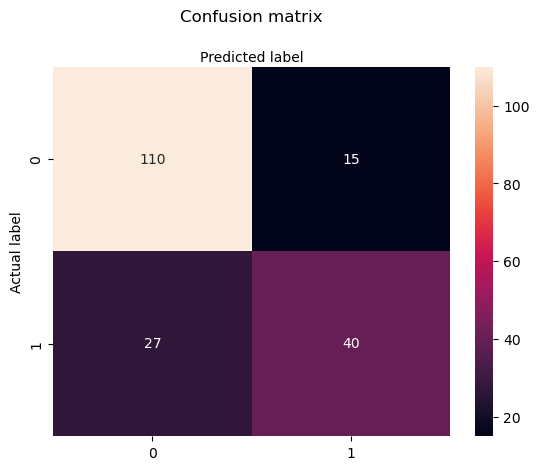

In [97]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g') #cmap="YlGnBu" ,
ax.xaxis.set_label_position("top")
# plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.78125
Precision: 0.7272727272727273
Recall: 0.5970149253731343


* Well, you got a classification rate of 80%, considered as good accuracy.

* Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.

* Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

*Task: Calculate all three matrices by yourself*

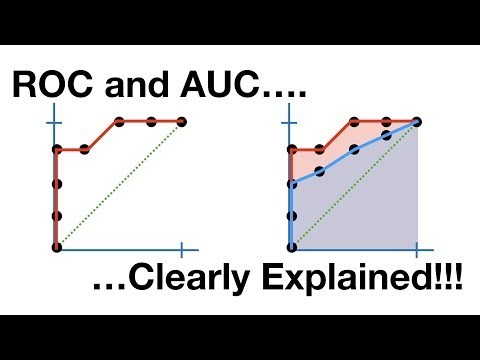

In [99]:
# what id ROC curve
from IPython.display import YouTubeVideo
YouTubeVideo('4jRBRDbJemM', start = 50, end  = 862)
# https://www.youtube.com/watch?v=4jRBRDbJemM

### ROC Curve
The ROC curve was first used during World War II for the analysis of radar signals before it was employed in signal detection theory.
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate.

Reference: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5   

# <center> ROC plot using probability of prediciton not classification of prediction

In [102]:
y_pred_proba = logreg.predict_proba(X_test)[::,1] #get probs

In [103]:
y_pred_cls =  logreg.predict(X_test) #get probs

# DO NOT use binary class prediction for ROC plot 

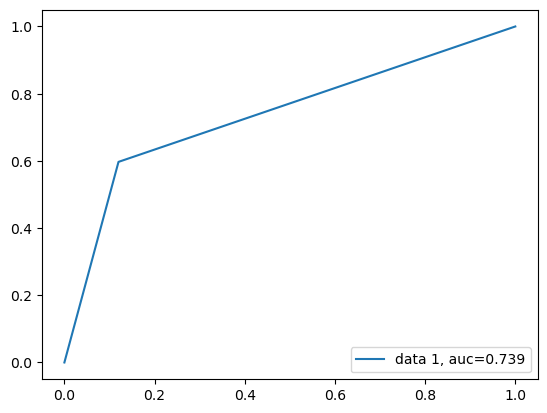

In [104]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_cls)
auc = metrics.roc_auc_score(y_test, y_pred_cls)
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc,3)))
plt.legend(loc=4)
plt.show()

# Instead use probability of 1 for ROC plot  

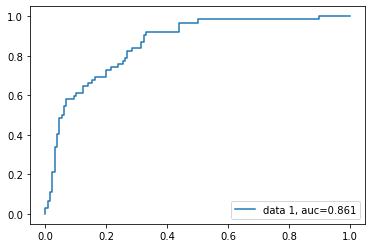

In [90]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc,3)))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

# Appendix

## Logistic regression Example 2

## Data

Let’s use the `iris` dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

<img src="Inputs/Iris plant.PNG" width="1200" height="900" /> 

In [91]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
iris
# iris.data
# iris.target

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [92]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Models

In [94]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0

In [95]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)
# we are done here~~~~

# solver="lbfgs" are part of the optimization method that is out of the scope of this class. 
# Pick the default ones when you encournter such case in the future.

LogisticRegression(random_state=42)

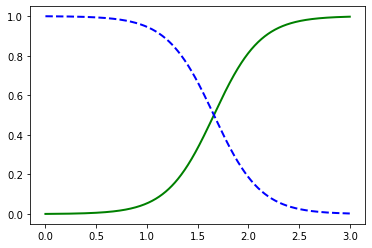

In [96]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

C:\Users\DADA\anaconda3\lib\site-packages\matplotlib\patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


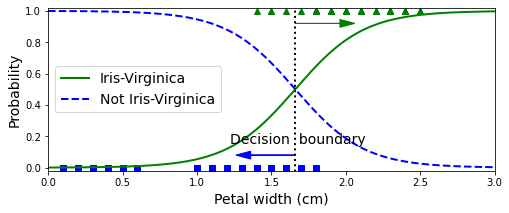

In [97]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [98]:
decision_boundary

array([1.66066066])

In [99]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

# Sigmoid vs Softmax

### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers (as discussed in
Chapter 3). This is called Softmax Regression, or Multinomial Logistic Regression.  

The idea is quite simple: when given an instance x, the Softmax Regression model
first computes a score sk(x) for each class k, then estimates the probability of each
class by applying the softmax function (also called the normalized exponential) to the
scores. The equation to compute sk(x) should look familiar, as it is just like the equation
for Linear Regression prediction

**Softmax score for class k**

$
s_k(\mathbf{x}) = ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x}
$


**Softmax function**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts
the class with the highest estimated probability (which is simply the class with the
highest score), as shown in

**Softmax Regression classifier prediction**

$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, \left( ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} \right)
$

## Cross entropy
**Cross entropy cost function**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**Cross entropy between two discrete probability distributions $p$ and $q$ (page 141):**
$ H(p, q) = -\sum\limits_{x}p(x) \log q(x) $


**Cross entropy gradient vector for class _k_**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

In [100]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [101]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)


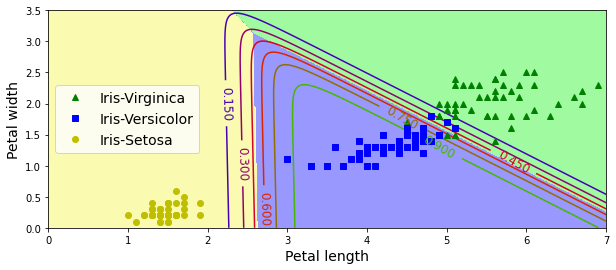

In [102]:

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [103]:
softmax_reg.predict([[5, 2]])

array([2])

In [104]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])



#### Least Squares Line

$$\hat{y} = a + bx$$

where 

$$b = \frac {{SS}_{xy}}{{SS}_{xx}}$$

and 

$$\bar{y} = a + b\bar{x}$$



#### Standard Errors
$$s_{e} = \sqrt \frac {SSResid}{n - 2}$$

$$s_{b} = \frac {s_{e}}{\sqrt {{SS}_{xx}}}$$

$$s_{a + bx} = s_{e} \sqrt {1 + \frac {1}{n} + \frac {(x - \bar{x})^2}{{SS}_{xx}}}$$

for prediction:

$$se(y - \hat{y}) = s_{e} \sqrt {1 + \frac {1}{n} + \frac {(x - \bar{x})^2}{{SS}_{xx}}}$$



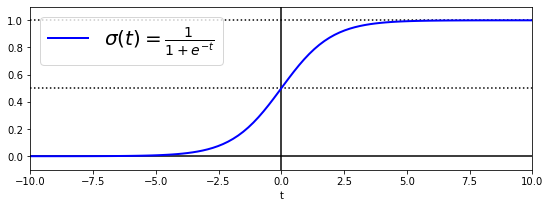

In [105]:
#Logistic (sigmoid) function
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## Linear Regression model (Machine Learning method)

In [106]:
from IPython.display import IFrame
IFrame(src='https://scikit-learn.org/stable/', width=1000, height=600)

In [107]:
# Step 1: data (with random noises) generation
np.random.seed(7) # to make this notebook's output stable across runs
nsample = 200
X = 2 * np.random.rand(nsample, 1)
y = 4 + 3 * X + np.random.randn(nsample, 1)
X_b = np.c_[np.ones((nsample, 1)), X]  # add x0 = 1 to each instance
X_new = np.array([0,2])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

In [108]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.01777976]), array([[2.95206276]]))

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [109]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.01777976],
       [2.95206276]])

# Linear regression using batch gradient descent

Better Suite large numbers of features ("Xn")

In [110]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100   # Sample size
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [111]:
theta

array([[4.01777976],
       [2.95206276]])

In [112]:
X_new_b.dot(theta)

array([[4.01777976],
       [9.92190528]])

#### Gradient Descent


<img src="Inputs/Gradient_Descent.PNG" alt="Kitten" width="850" height="600" />




```python
eta = 0.1  # learning rate
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
```

In this particular case


**Partial derivatives of the cost function**

$
\dfrac{\partial}{\partial \theta_j} \text{MSE}(\boldsymbol{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}
$

(To save time, the derivation of the equation is omitted from this class)

#### Choosing the optimal "Learning Rate" is key to train the model
<table><tr><td><img src='Inputs/LearningRateTooSmall.png'></td><td><img src='Inputs/LearningRateTooLarge.png'></td></tr></table>

In [113]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

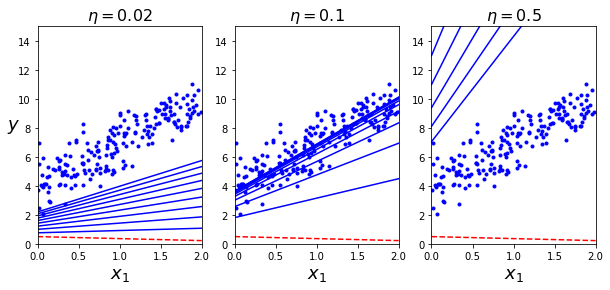

In [114]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.
<table><tr><td><img src='Inputs/FeatureScale.PNG'></td></tr></table>

# Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Obviously this makes the algorithm much faster
since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each
iteration (SGD can be implemented as an out-of-core algorithm.)

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average.
Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down (see Figure below). So once the algorithm
stops, the final parameter values are good, but not optimal.

<table><tr><td><img src='Inputs/StochasticGradientDescent.PNG'></td></tr></table>

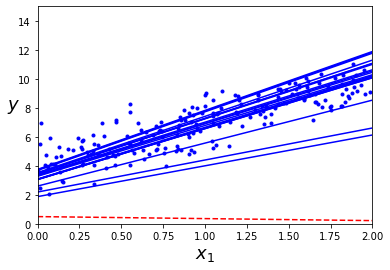

In [115]:
# Simulated Annealing
# This code implements Stochastic Gradient Descent using a simple learning schedule:

theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

In [116]:
theta

array([[4.00874955],
       [2.97040337]])

perform Linear Regression using SGD with Scikit-Learn

In [117]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.00435375]), array([2.93487361]))

# Mini-batch gradient descent

At each step, instead of computing the gradients based on the full training
set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-
batch GD computes the gradients on small random sets of instances called minibatches.
The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

In [118]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [119]:
theta

array([[4.14108659],
       [3.10829591]])

In [120]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

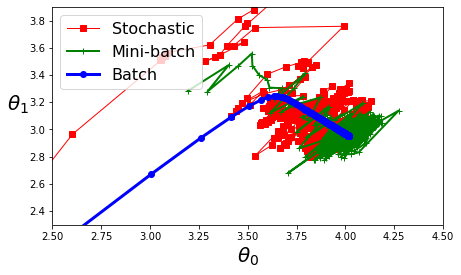

In [121]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# Polynomial regression

In [122]:
import numpy as np
import numpy.random as rnd

np.random.seed(7)

In [123]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

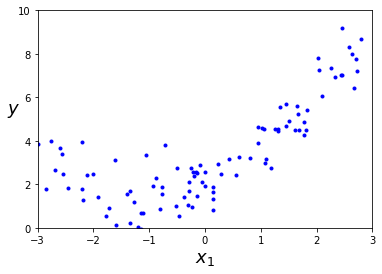

In [124]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [125]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.54215026])

In [126]:
X_poly[0]

array([-2.54215026,  6.46252796])

In [127]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00725434]), array([[1.05076701, 0.49607621]]))

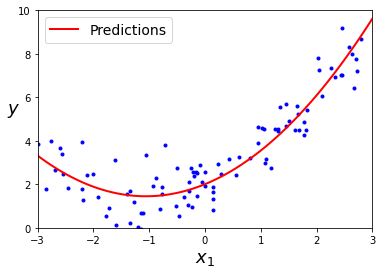

In [128]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

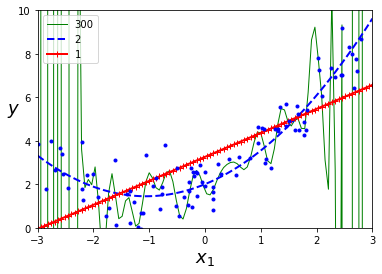

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

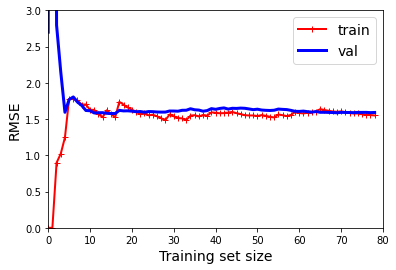

In [131]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()                                      # not shown

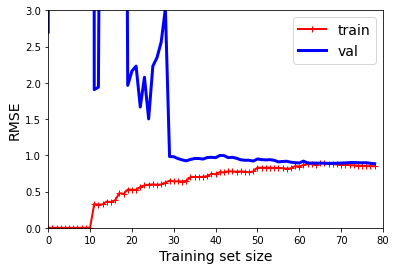

In [132]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

# Regularized models

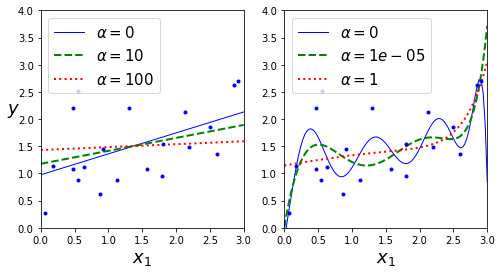

In [133]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

### Ridge Regression
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear
Regression: a regularization term equal to $ \dfrac{1}{2} \alpha \sum\limits_{i=1}^{n}{\theta_i}^2$  is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

**Ridge Regression penalty/cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) +  \dfrac{1}{2}\alpha\sum\limits_{i=1}^{n}{\theta_i}^2
$


In [134]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [135]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

In [136]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

### Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2 norm (see Equation below).

**Lasso Regression cost function**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$


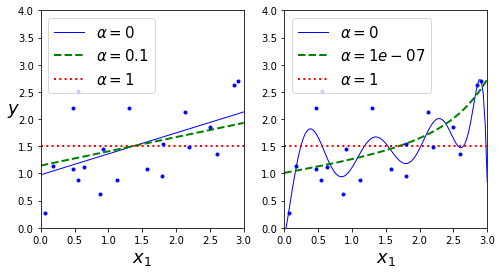

In [137]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)
plt.show()

In [138]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### ElasticNet

In [139]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping

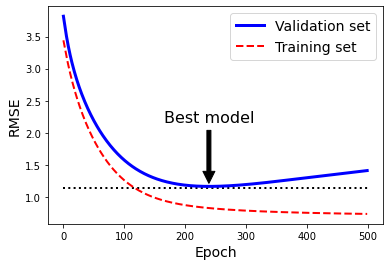

In [140]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [141]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [142]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [143]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

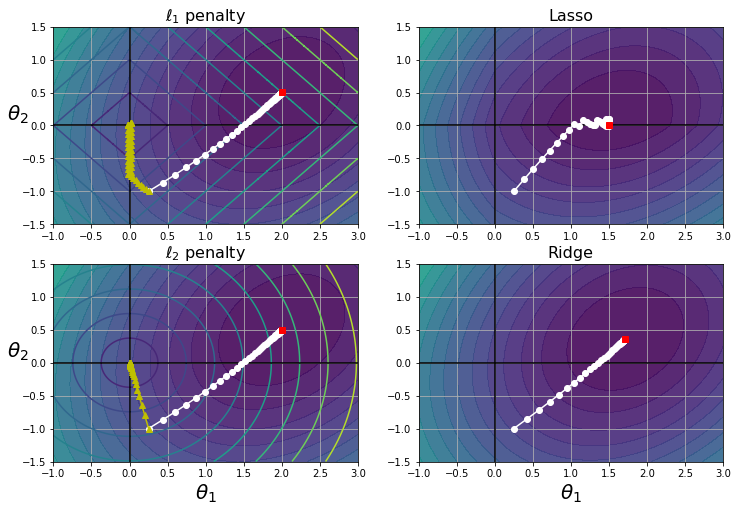

In [144]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

In [145]:
# Importing the libraries
import sklearn


In [146]:
# Logistic Regression

# Importing the dataset
dataset = pd.read_csv('./References/P14-Logistic-Regression/Logistic_Regression/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


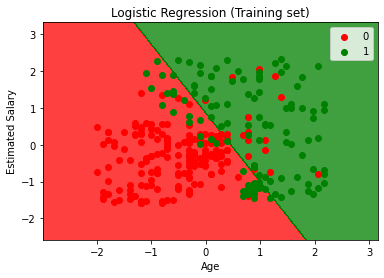

In [147]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


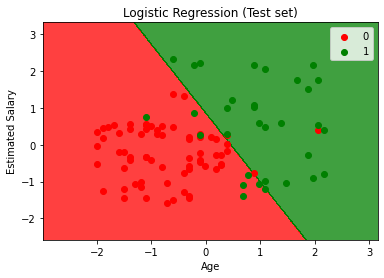

In [148]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### F-statistic

The alternative hypothesis is that at least one of the regression coefficients should be non-zero. 

$$F = \frac{R^2/p}{(1-R^2)/(n-p)} = \frac{explained\ variation/p}{(unexplained\  variation)/(n-p)}$$

In [149]:
import scipy

N = result.nobs
P = result.df_model
dfn, dfd = P, N - P - 1
F = result.mse_model / result.mse_resid

# F2 = r_square/P/(1-r_square)*(N-P)
p = 1.0 - scipy.stats.f.cdf(F,dfn,dfd)
print ('F-statistic: {:.3f},  p-value: {:.5f}'.format( F, p )) 

# because the p-value is less than 0.001, we reject null hypothesis that all regression coefficents are equal to zero 
# at significance level of 0.001.

F-statistic: 620.785,  p-value: 0.00000


References:   
http://connor-johnson.com/2014/02/18/linear-regression-with-python/  
https://adataanalyst.com/machine-learning/guide-for-linear-regression-using-python-part-2/  
https://medium.com/fintechexplained/end-to-end-guide-for-machine-learning-project-146c288186dc